In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import yfinance as yf
import fredapi as fa
from datetime import date, timedelta
from Sector_Exposure import Rate_Exposures
import numpy as np
import matplotlib.pyplot as plt
import Useful_Functions as useful

fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')

#useful.current_rates("m", descrip=False)

In [2]:


useful.update_data()



In [2]:

def update_data(compare_group = None):
    
    assert compare_group
    
    fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')
    
    # "ten", "two",
    sector_names = ['Materials', 'Industrials', 'Consumer Discretionary', 
                        'Consumer Staples', 'Health Care',
                        'Financials', 'Information Technology', 
                        'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', "Aerospace",
                        "SP-500", "Real Yield", "Yield Curve"]
    
    # "ten", "two",
    factor_names = ['Value', 'Quality', 'Size', 'Default', "Real Yield", "Yield Curve"]
    
    if 'sector' in compare_group.lower():
        
        d = "1980-01-04"
        
        sec = yf.download([f"^SP500-{i}" for i in range(15,65,5)], start = d, progress=False)["Close"]
        sec['Energy'] = yf.download(["^GSPE"], start = d, progress=False)["Close"]
        sec['Semiconductors'] = yf.download(["SOXX"], start = d, progress=False)["Close"]
        sec['Aerospace'] = yf.download(["ITA"], start = d, progress=False)["Close"]
        sec['SP-500'] = yf.download("^GSPC", start = d, progress=False)["Close"]
        sec['Real Yield'] = fred.get_series('DFII10', observation_start = d, end = date.today())
        sec['Yield Curve'] = fred.get_series('T10Y2Y', observation_start = d, end = date.today())
        
    if 'factor' in compare_group.lower():
        
        fact = pd.DataFrame()
        fact['Value'] = yf.download(["VLUE"], start = d, progress=False)["Close"]
        fact['Quality'] = yf.download(["QUAL"], start = d, progress=False)["Close"]
        fact['Size'] = yf.download(["SIZE"], start = d, progress=False)["Close"]
        fact['Default'] = yf.download(["FIBR"], start = d, progress=False)["Close"]
        fact['Real Yield'] = sec['Real Yield']
        fact['Yield Curve'] = sec['Yield Curve']
    
    #sec['ten'] = fred.get_series('DGS10', observation_start = d, end = date.today())
    #sec['two'] = fred.get_series('DGS2', observation_start = d, end = date.today())
    
    if 'sector' in compare_group.lower():
        sec.columns = sector_names
        return sec.dropna()
    
    if 'factor' in compare_group.lower():
        sec.columns = factor_names
        return sec.dropna()


#factor_df = update_data('factors')
#sector_df = update_data('sectors')



In [116]:


#sector_df[['Real Yield','Yield Curve']].plot()

#sector_df = pd.read_csv("sectors_and_rates.csv", index_col="Date")
#factor_df = pd.read_csv("factors_and_rates.csv", index_col="Date")

#sector_df
#factor_df

sector_df = pd.read_csv("2006.csv", index_col="Date")

sector_df

,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace,SP-500,Real Yield,Yield Curve
Date,,,,,,,,,,,,,,,,
2006-05-05,213.500000,325.660004,273.040009,246.539993,356.480011,458.089996,341.279999,128.830002,162.699997,144.369995,435.980011,68.519997,25.990000,1325.760010,2.45,0.18
2006-05-08,214.250000,325.070007,273.230011,247.910004,356.350006,456.089996,341.420013,129.630005,161.630005,145.300003,434.399994,68.370003,25.889999,1324.660034,2.45,0.15
2006-05-09,216.000000,325.619995,274.089996,248.559998,354.179993,456.869995,339.709991,129.759995,160.300003,145.149994,437.420013,67.720001,25.865000,1325.140015,2.43,0.16
2006-05-10,215.699997,325.429993,274.290009,247.649994,353.799988,457.000000,335.899994,128.809998,161.229996,145.710007,439.630005,66.300003,25.985001,1322.849976,2.43,0.12
2006-05-11,212.529999,322.760010,271.619995,244.889999,352.450012,449.820007,327.869995,127.540001,159.610001,142.259995,434.609985,64.570000,25.695000,1305.920044,2.43,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,517.150024,757.200012,1098.910034,732.760010,1510.910034,546.489990,2285.750000,193.789993,362.820007,264.799988,618.929993,396.950012,96.269997,3901.360107,0.23,0.18
2022-05-23,526.700012,769.570007,1105.910034,748.130005,1523.060059,564.159973,2339.850098,197.300003,367.220001,268.019989,635.510010,398.660004,98.110001,3973.750000,0.26,0.21
2022-05-24,523.510010,768.630005,1077.390015,760.559998,1526.939941,562.830017,2303.189941,189.990005,374.609985,271.250000,638.090027,388.950012,98.839996,3941.479980,0.21,0.26


In [4]:

correlations = {}

drops = [col for col in sector_df.columns if col == "SP-500" or col in ['Real Yield', 'Yield Curve']]

consider = sector_df.pct_change()

for num, d in enumerate(sector_df.index):
    
    if num > 0 and (num+500 < len(sector_df)):
        
        # (sector_df[num:num+window].corr()[self.benchmark])
        correlations[d] = {}
        
        for sec in sector_df.columns.drop(drops):
            correlations[d][sec] = useful.beta_asset_to_index(consider[[sec, "SP-500"]][num:num+500].values)



In [117]:

exposure_report = Rate_Exposures(sector_df, 252, 60, ['Real Yield', 'Yield Curve'], "SP-500")


In [8]:


betas = exposure_report.get_correlations(60)



In [15]:


exposure_report



Materials  Industrials  Consumer Discretionary  Consumer Staples  \
-3 -3  -0.026363     0.017560               -0.008709         -0.025087   
    1   0.017503     0.014523                0.049787         -0.033979   
-2 -3  -0.013687     0.010258                0.028487         -0.017106   
   -2  -0.016479     0.003090               -0.002674         -0.013407   
   -1  -0.016572    -0.010941                0.011011          0.004569   
    0  -0.028294    -0.060247                0.019363          0.044537   
    1   0.059129     0.061857               -0.003318         -0.009532   
    2   0.040469     0.033901                0.079377         -0.020798   
-1 -3   0.062204     0.011989                0.010244         -0.036239   
   -2  -0.007774    -0.006080               -0.002948         -0.016040   
   -1  -0.003452    -0.005486               -0.003303         -0.009882   
    0  -0.004610    -0.013746                0.021291          0.003111   
    1  -0.013947     0.003018               -0.017078         -0.026944   
    2  -0.005690    -0.018752               -0.015288         -0.055079   
    3  -0.001885     0.048943               -0.034481         -0.040799   
    4   0.047061    -0.033332                0.101609         -0.121489   
 0 -3   0.025531     0.035406               -0.063293          0.061547   
   -2   0.011053    -0.009420                0.052678          0.009702   
   -1   0.009490     0.004680               -0.009289         -0.057452   
    0  -0.012122    -0.015571                0.001447         -0.001928   
    1  -0.032614    -0.014345                0.004780          0.017635   
    4   0.094567     0.078322               -0.050961          0.005303   
 1 -4  -0.034297    -0.012699               -0.028727          0.091588   
   -3   0.058858    -0.001822               -0.027819          0.023240   
   -2  -0.004398     0.004974                0.008479         -0.029618   
   -1  -0.017758     0.002435                0.006661         -0.002462   
    0  -0.066546    -0.007267                0.035957          0.033935   
    1  -0.008225     0.011621               -0.001801         -0.029945   
    2   0.009538    -0.001272               -0.007737         -0.040441   
    4   0.020522     0.000490               -0.024946         -0.012061   
 2 -3   0.083280     0.024677               -0.077642          0.084989   
   -2  -0.007282    -0.012986                0.000831          0.025715   
   -1  -0.025748    -0.007215                0.020179         -0.002477   
    0   0.023830     0.016786               -0.029108         -0.081048   
    1  -0.084836    -0.012665                0.043052          0.044928   
    2   0.009148     0.001115                0.002783         -0.011204   
    3   0.049289     0.031014                0.014886         -0.036310   
 3 -2   0.043807    -0.001948               -0.026598          0.059120   
    0  -0.021589    -0.029053                0.006922         -0.095386   
 4  2  -0.014387     0.021668                0.023678         -0.032613   
 6  3   0.020528     0.023358                0.027596         -0.036054   

       Health Care  Financials  Information Technology  \
-3 -3    -0.002131   -0.004702                0.031793   
    1    -0.052941   -0.033153                0.050295   
-2 -3     0.001393   -0.015294                0.001661   
   -2     0.011276    0.030725                0.021983   
   -1     0.002589    0.020225                0.007429   
    0     0.040390   -0.071954                0.041849   
    1    -0.019922    0.029854               -0.013220   
    2    -0.059226   -0.049754                0.058209   
-1 -3    -0.018819    0.029006               -0.025269   
   -2     0.006990    0.009246                0.018836   
   -1     0.003784    0.030049                0.005854   
    0    -0.009611    0.002619                0.012183   
    1     0.017738    0.003164                0.025957   
    2    -0.012712    0.056294              

In [15]:



useful.beta_asset_to_index(sector_df[['Materials', "SP-500"]].pct_change().dropna()[:20].values)




0.7686928983803405

In [42]:

bruh = sector_df[['Materials', "SP-500"]]

mat_vs_sp500 = bruh.values

#np.cov(mat_vs_sp500).shape

ok = np.vstack((mat_vs_sp500[:,0], mat_vs_sp500[:,1]))

#mat_vs_sp500.shape


def beta_asset_to_index(asset_to_index):
    
    asset_to_index = np.vstack((asset_to_index[:,0], asset_to_index[:,1]))
    
    #log_returns = np.log(asset_to_index/asset_to_index.shift()).values
    
    return np.cov(asset_to_index)[0][1] / np.var(asset_to_index)


beta_asset_to_index(bruh)

#useful.beta(bruh)


nan

In [34]:

bruh.cov()



,Materials,SP-500
Materials,8942.002412,89914.310948
SP-500,89914.310948,942358.638962


<BarContainer object of 4 artists>

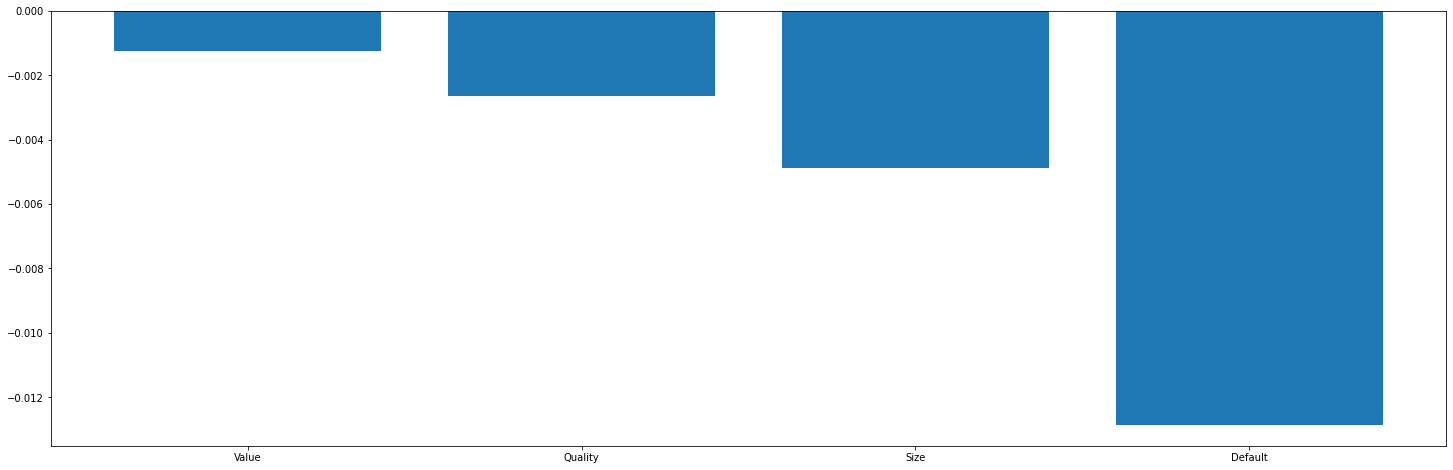

In [7]:


#plt.scatter(exposure_report.mean_returns.Materials.index, exposure_report.mean_returns.Materials)

plt.figure(figsize = (25, 8))
plt.bar(exposure_report.mean_returns_monthly.loc[(4.0, 0.0)].index, exposure_report.mean_returns_monthly.loc[(4.0, 0.0)])



In [9]:


exposure_report.signal_dates_and_returns(True, "Default", (2,-2))



2018-03   -0.007347
2018-05    0.004352
Freq: M, Name: Default, dtype: float64

<AxesSubplot:>

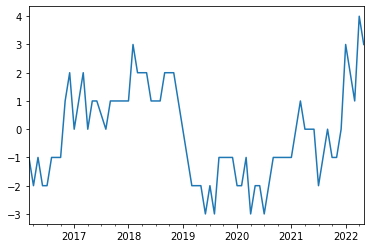

In [24]:


ok = exposure_report.scores['Real Yield'].copy()


round(ok.groupby(pd.PeriodIndex(ok.index, freq="M")).mean(), 0).plot()

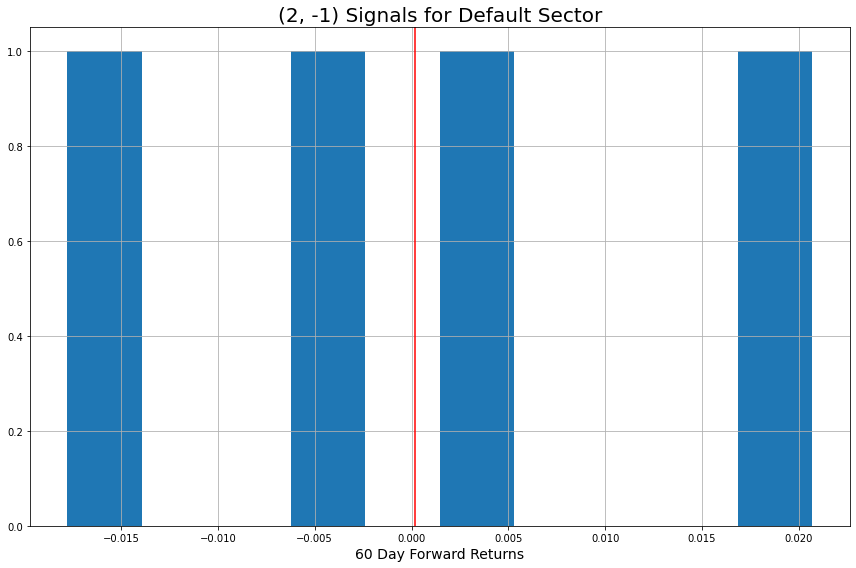

In [17]:


# (4,3)
# 'Information Technology'
exposure_report.show_return_distribution(True, 'Default', (2, -1))

#real_rate.total_returns



In [35]:

both = pd.Series([(r,c) for r,c in zip(exposure_report.scores['Real Yield'].dropna(), exposure_report.scores['Yield Curve'].dropna())], 
                 index = exposure_report.scores['Yield Curve'].dropna().index)

### Combined real rate and yield curve signals ### 
counts = both.value_counts()

### Top 20 combined real rate and yield curve signals ### 
counts[:20]

(-2.0, -1.0)    70
(-1.0, -1.0)    59
(1.0, -2.0)     58
(-1.0, 1.0)     57
(0.0, -2.0)     55
(-1.0, -0.0)    53
(-2.0, -0.0)    44
(3.0, -1.0)     41
(0.0, 2.0)      40
(-1.0, 2.0)     39
(2.0, -1.0)     38
(-0.0, -1.0)    37
(1.0, -1.0)     35
(0.0, 1.0)      35
(-1.0, 3.0)     31
(-0.0, -0.0)    28
(-2.0, 1.0)     28
(-1.0, -2.0)    28
(-3.0, -1.0)    27
(-2.0, 2.0)     27
dtype: int64

In [24]:



exposure_report.total_returns[(2,-2)].Semiconductors.sort_values()


2018-03-09   -0.083471
2018-03-16   -0.076266
2018-03-07   -0.071016
2018-03-19   -0.069862
2018-03-26   -0.045560
2018-03-23   -0.037838
2018-03-06   -0.031694
2017-10-20   -0.025182
2018-03-02   -0.019335
2018-03-05   -0.009328
2017-11-30   -0.007982
2018-02-28    0.000462
2017-10-18    0.004565
2018-10-30    0.026035
2018-10-31    0.029109
2021-06-21    0.030967
2017-05-23    0.045887
Name: Semiconductors, dtype: float64

In [30]:

# Factor Tickers:

# ^SPXQUP


# Value: VLUE
# Quality: QUAL
# Momentum: MTUM
# Size: SIZE
# Default: FIBR




HTTPError: HTTP Error 403: Forbidden

In [16]:


def beta(data_2_columns):
    
    log_returns = np.log(data_2_columns/data_2_columns.shift())
    
    return (log_returns.cov() / log_returns.var())[log_returns.columns[0]].iloc[1]
    
    



In [17]:



beta(real_rate_df[['Materials', 'SP-500']])




0.7246502122767499

In [8]:

mat = c.get_sector_forward_return(c.scores, "Materials")

AttributeError: 'CompareSectors' object has no attribute 'get_sector_forward_return'

In [21]:


yuh['Materials'] == mat['30-Day Forward Return']




2012-01-09    True
2012-01-10    True
2012-01-11    True
2012-01-12    True
2012-01-13    True
              ... 
2022-04-07    True
2022-04-08    True
2022-04-11    True
2022-04-12    True
2022-04-13    True
Length: 2437, dtype: bool

In [7]:

# .drop(columns = ['SP-500'])
c = CompareSectors(cool, 252*2, 30)

rets = c.get_return_means()




['Materials', 'Industrials', 'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 'Information Technology', 'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', 'Aerospace']
Materials
Industrials
Consumer Discretionary
Consumer Staples
Health Care
Financials
Information Technology
Telecommunication Services
Utilities
Real Estate
Energy
Semiconductors
Aerospace


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace
-5,0.000617,-0.030278,0.037210,-0.030313,0.001725,-0.037020,0.027196,0.017230,-0.036913,-0.049653,-0.011154,0.034408,-0.049139
-4,0.015785,0.004656,0.004084,0.000982,-0.001610,-0.001997,0.009602,-0.008703,-0.016870,-0.015350,-0.051065,0.027530,-0.017540
-3,-0.002614,-0.004092,0.008682,-0.002052,-0.004110,-0.005038,0.016778,0.000358,-0.023473,-0.022742,-0.050373,0.016872,-0.022844
-2,0.000078,-0.005131,0.003580,-0.007578,-0.001113,0.004697,0.008820,-0.002957,-0.007394,-0.004183,-0.027857,0.022025,-0.008390
-1,-0.001979,0.001682,-0.001101,-0.010535,-0.004486,0.014369,0.007386,-0.007523,-0.018441,-0.009586,0.010230,0.020499,0.007172
0,-0.005030,-0.002615,0.004167,-0.003534,0.005477,0.002719,0.007727,-0.012287,-0.010024,-0.008719,-0.005225,0.009708,0.005941
1,-0.006908,0.000436,0.006225,-0.000484,0.004490,-0.007563,0.005541,-0.005057,0.003821,-0.000555,-0.005824,0.000128,0.006095
2,-0.006246,-0.000188,0.000731,0.000422,0.005234,-0.012030,0.008704,-0.011417,0.017655,0.010462,-0.006029,0.003556,0.008820
3,-0.005670,-0.007613,-0.000279,0.010308,0.011246,-0.009736,0.002744,-0.006375,0.027451,0.020651,-0.015335,0.008562,0.002098
4,0.005307,0.004287,-0.004293,0.014081,0.015563,-0.006457,-0.009928,-0.026052,0.023247,0.006317,0.023326,0.004056,0.016567


In [51]:


#c.get_sector_forward_return(c.scores, "Materials")['30-Day Forward Return'].plot()


#(-1*(cool['Materials'].diff(-30)/cool['Materials'])).plot()

(cool.iloc[60] / cool.iloc[30]) - 1

Materials                     0.066729
Industrials                   0.102437
Consumer Discretionary        0.096237
Consumer Staples              0.036774
Health Care                   0.023846
Financials                    0.116396
Information Technology        0.066650
Telecommunication Services    0.037410
Utilities                     0.019621
Real Estate                   0.133663
Energy                        0.014165
Semiconductors                0.055306
Aerospace                     0.113164
Real Yield                    0.095890
SP-500                        0.063592
dtype: float64

<BarContainer object of 9 artists>

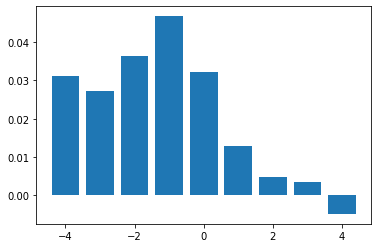

In [65]:
import matplotlib.pyplot as plt

#rets.mean(axis=1)


plt.bar(rets.index, rets['Semiconductors'])



<BarContainer object of 9 artists>

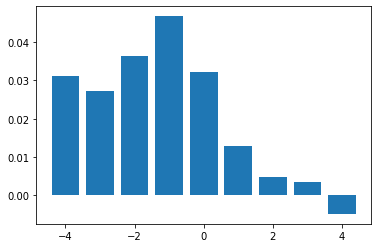

In [77]:


plt.bar(rets.index, rets['Semiconductors'])



In [70]:

semi = c.get_sector_forward_return(c.scores, "Semiconductors")



0.07894736842105263

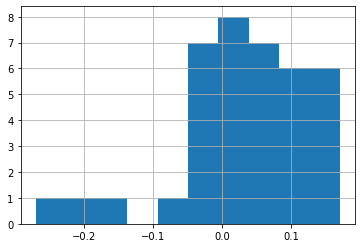

In [80]:



semi['30-Day Forward Return'].loc[semi.Scores == -4].hist()


len(semi['30-Day Forward Return'].loc[semi.Scores == -4])

